# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 

The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# Hypothestis Generation

This is a very important stage in any machine learning process. 
It basically involves brainstorming and coming up with as many ideas as possible about what could affect the target variable.
It helps us in exploring the data at hand more efficiently and effectively. 
Hypothesis Generation should be done before seeing the data or else we will end up with biased hypotheses. 
Following are some of the hypotheses based on the problem statement.

1.Sales are higher during weekends.
2.Higher sales during morning and late evening.
3.Higher sales during end of the year.
4.Store size affects the sales.
5.Location of the store affects the sales.
6.Items with more shelf space sell more.

# Loading Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [2]:
train1=train.copy()
test1=test.copy()

In [3]:
train1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
test1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


# Exploratory Data Analysis

In [5]:
train1.shape,test1.shape

((8523, 12), (5681, 11))

In [6]:
train1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
test1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [8]:
train1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
test1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [10]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# Missing Value Treatment

In [12]:
train1.duplicated().sum()

0

In [13]:
train1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
#Replacing NULL values in Numerical columns using Median
median=train1['Item_Weight'].median()
train1['Item_Weight'].replace(np.nan,median,inplace=True)

In [15]:
#Replacing NULL values in Categoical columns using Mode
mode=train1['Outlet_Size'].mode().values[0]
train1['Outlet_Size']=train1['Outlet_Size'].replace(np.nan,mode)

In [16]:
train1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
categorical_train = train1.select_dtypes(include = 'object')
numerical_train= train1.select_dtypes(exclude = 'object')

In [18]:
print(f"There are {len(categorical_train.columns)} Categorical Attributes")
print(f"There are {len(numerical_train.columns)} Numerical Attributes")

There are 7 Categorical Attributes
There are 5 Numerical Attributes


In [19]:
train1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
train1['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Count'>

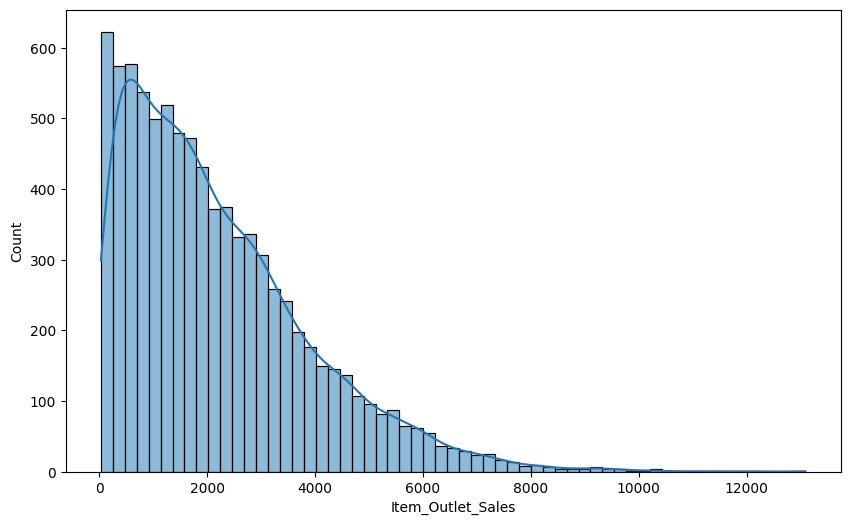

In [21]:
plt.figure(figsize = (10,6))
sns.histplot(data = train1, x = 'Item_Outlet_Sales', kde = True)

# Outlier Detection

<AxesSubplot: ylabel='Item_Outlet_Sales'>

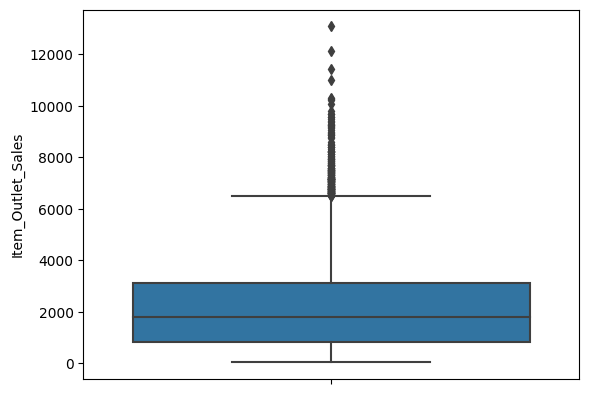

In [22]:
sns.boxplot(y=train1['Item_Outlet_Sales'])

In [23]:
#Removing outliers from Item_Visibility column and Item_Outlet_Sales column
#Drop the outlier value
#Replace the outlier value using the IQR
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

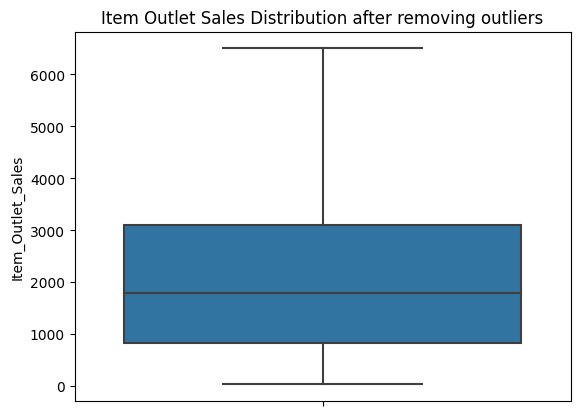

In [24]:
lower_itemsales,higher_itemsales=remove_outlier(train1['Item_Outlet_Sales'])
train1['Item_Outlet_Sales']=np.where(train1['Item_Outlet_Sales']>higher_itemsales,higher_itemsales,train1['Item_Outlet_Sales'])
train1['Item_Outlet_Sales']=np.where(train1['Item_Outlet_Sales']<lower_itemsales,lower_itemsales,train1['Item_Outlet_Sales'])

sns.boxplot(y=train1['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution after removing outliers')

We will not be fixing skewness in our target attribute as it given incorrect RMSE

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Count'>

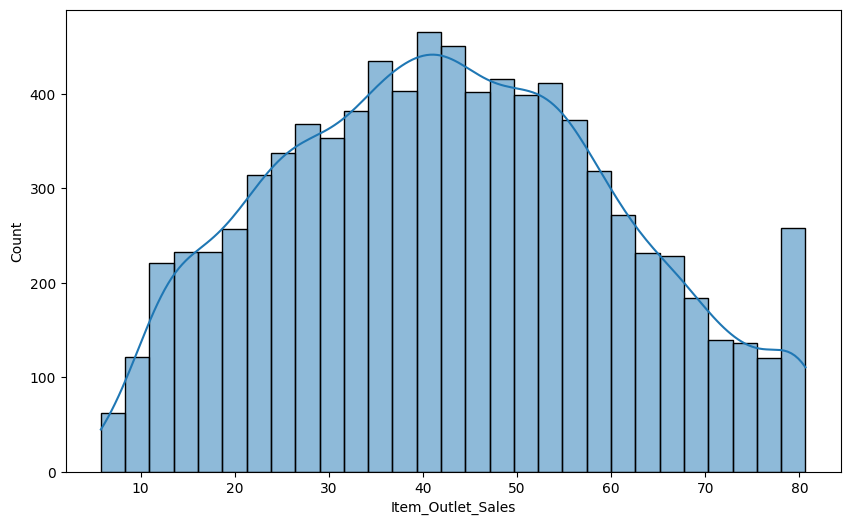

In [25]:
## Function for fixing positive skewness
def sqrt_transformation(dataframe):
    return np.sqrt(dataframe)
train1['Item_Outlet_Sales'] = train1['Item_Outlet_Sales'].map(sqrt_transformation)
# After fixing skewness

plt.figure(figsize = (10,6))
sns.histplot(data = train1, x = 'Item_Outlet_Sales', kde = True)

# Univariate Analysis

Let’s start with univariate EDA. It involves exploring variables individually. We will try to visualize the continuous variables using histograms and categorical variables using bar plots.

# Independent Variables (numeric variables)

In [26]:
train2=train1.copy()

In [27]:
numerical_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

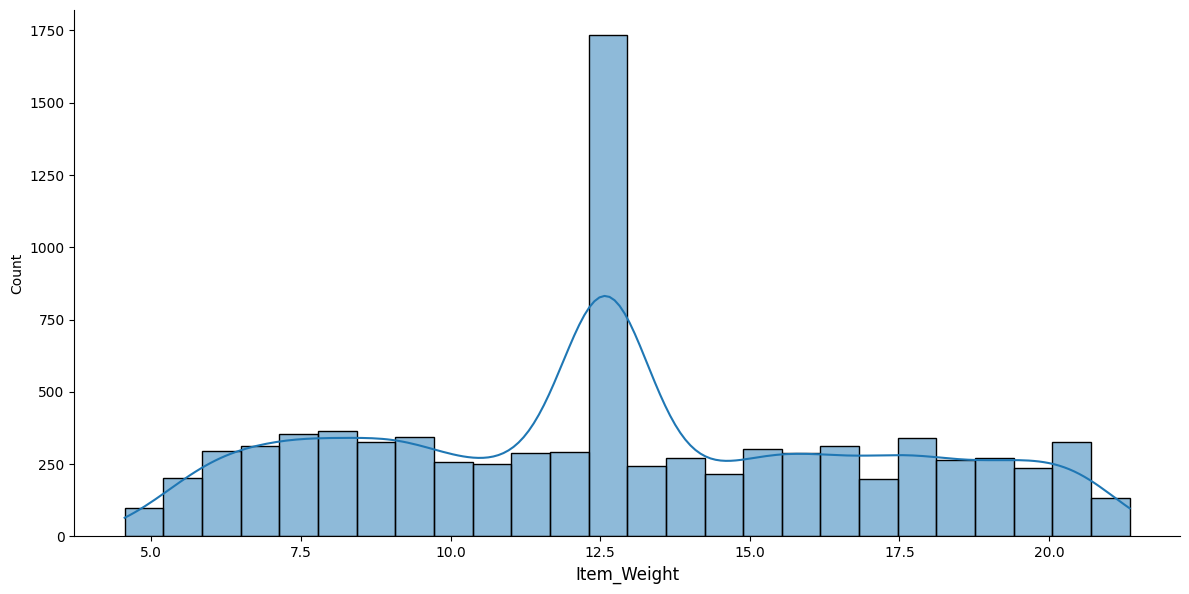

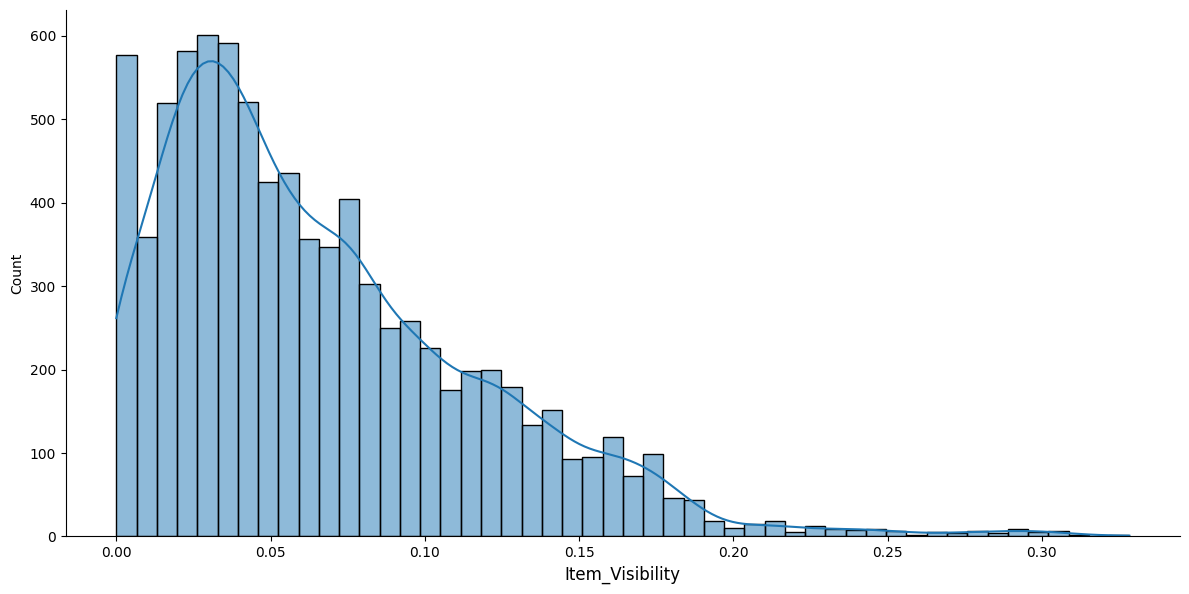

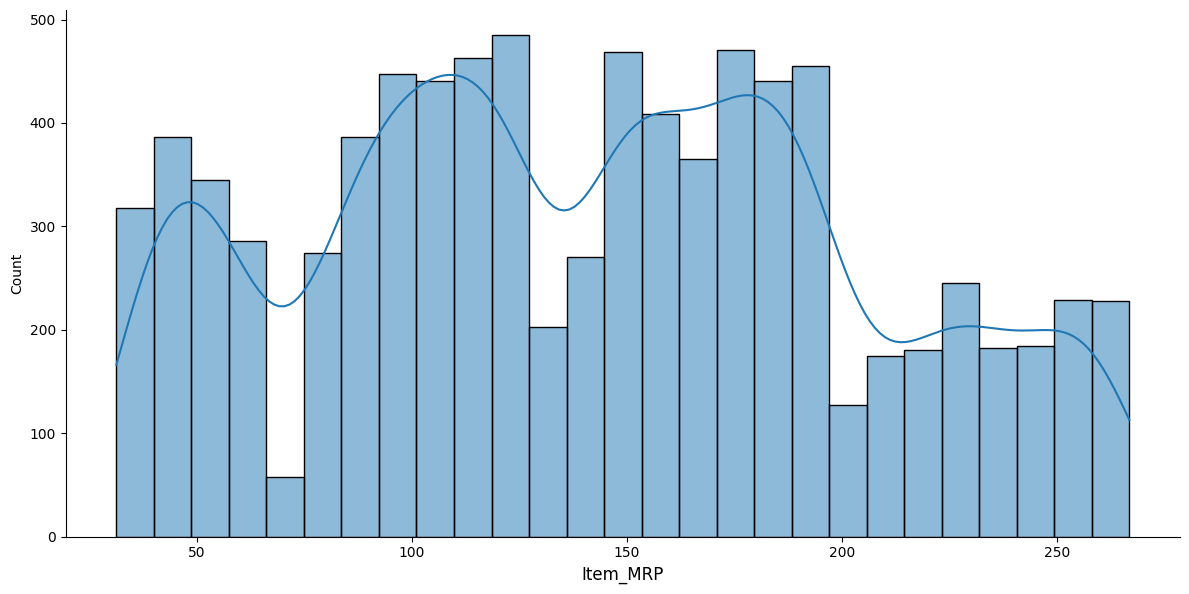

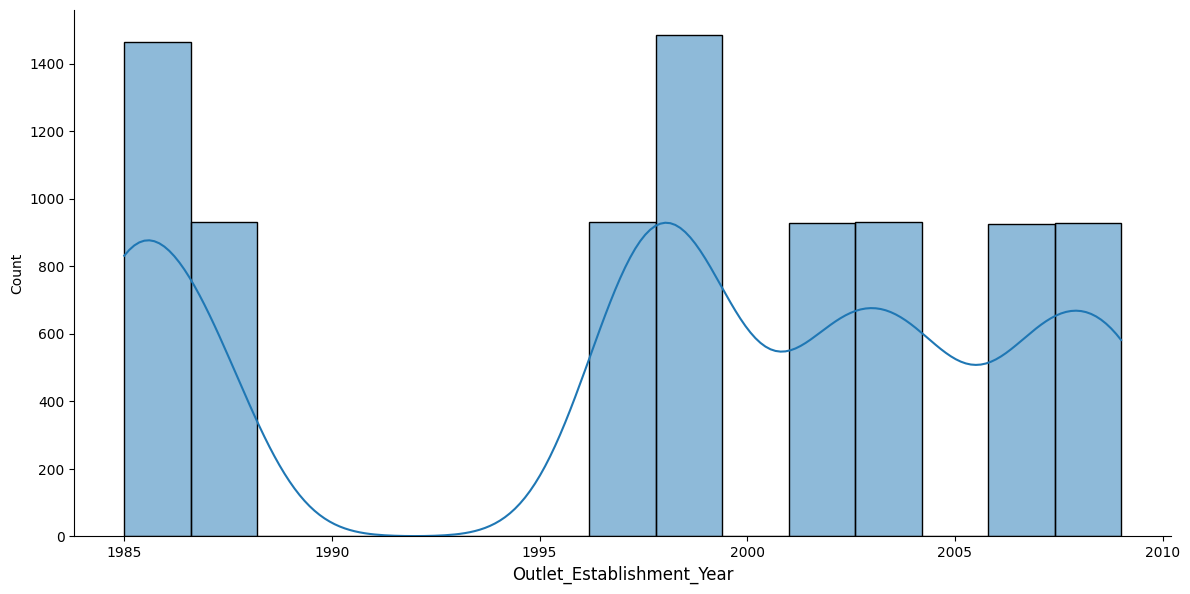

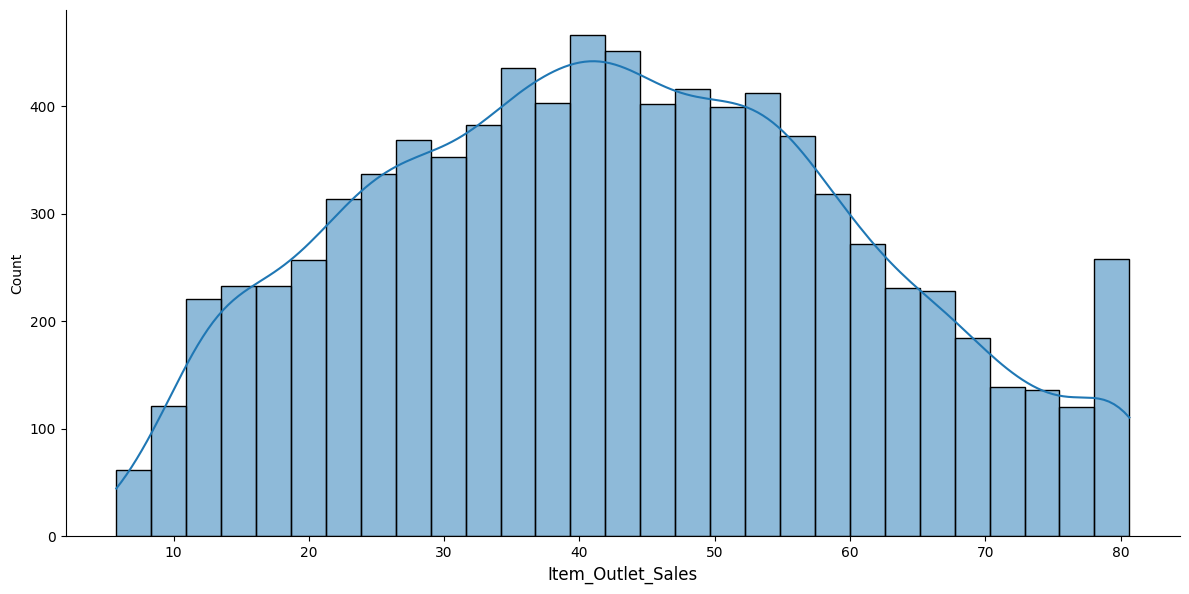

In [28]:
for i in numerical_train:
    sns.displot(data = train2, x = i, kde = True, aspect = 2, height = 6)
    plt.xlabel(i, fontsize = 12)

There seems to be no clear-cut pattern in Item_Weight. Item_Visibility is right-skewed and should be transformed to curb its skewness. We can clearly see 4 different distributions for Item_MRP. It is an interesting insight.

<AxesSubplot: ylabel='Item_Weight'>

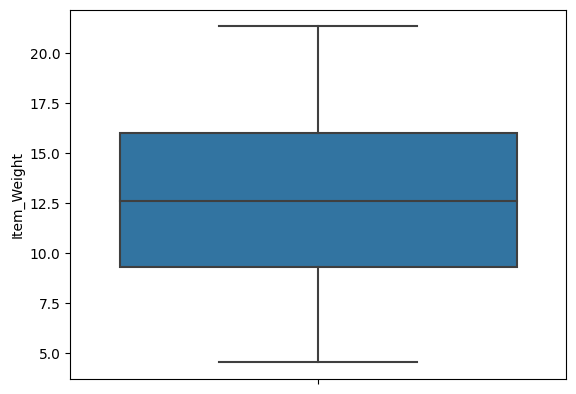

In [29]:
sns.boxplot(y=train1["Item_Weight"])

<AxesSubplot: ylabel='Item_Visibility'>

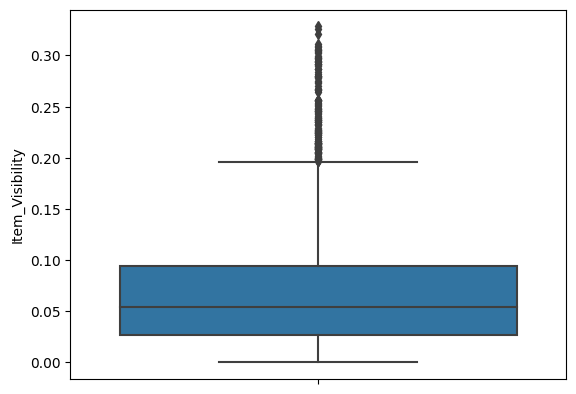

In [30]:
sns.boxplot(y=train1['Item_Visibility'])

<AxesSubplot: ylabel='Item_MRP'>

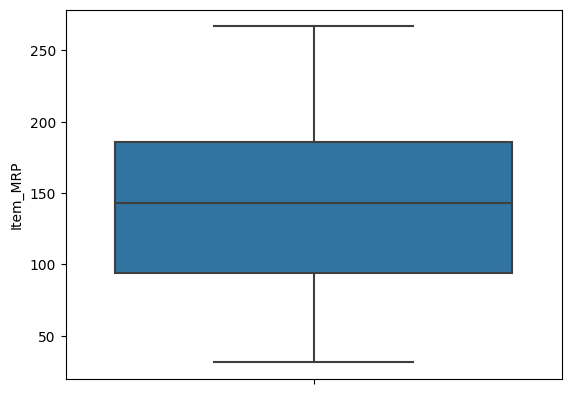

In [31]:
sns.boxplot(y=train1['Item_MRP'])

Item_Visibility contains outliers, and as well as it is positively skewed on both the dastaset. Let's fix this.

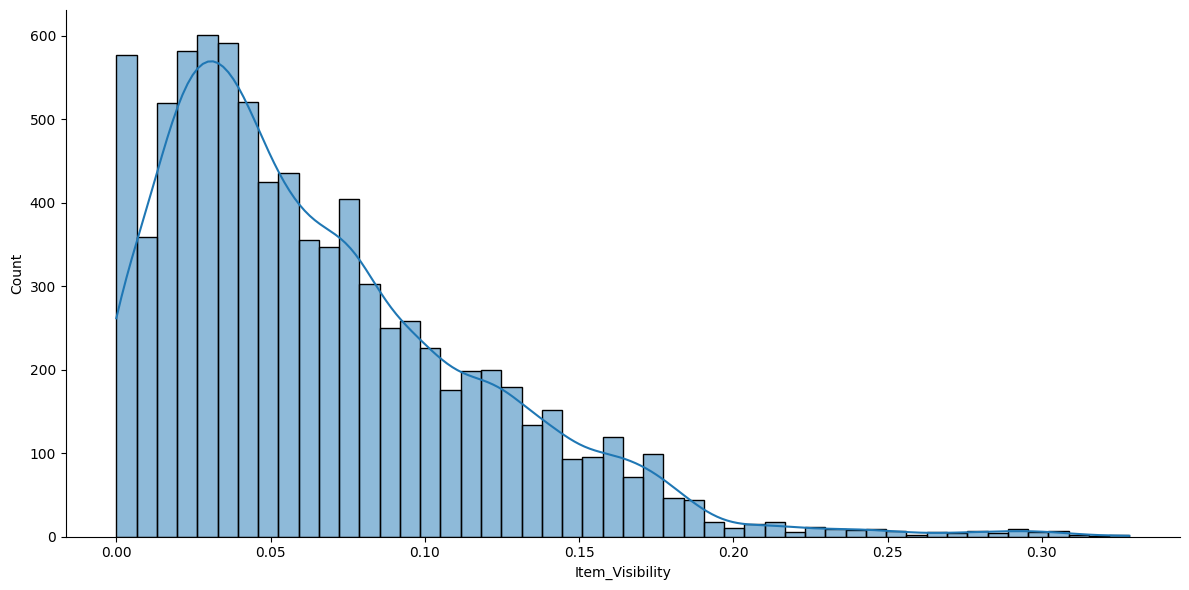

In [32]:
sns.displot(data = train2, x = 'Item_Visibility', kde = True, aspect = 2, height = 6)

It contains a 0 value, let's fix that too

In [33]:
## First Removing strange '0'

train2['Item_Visibility'].replace(0, train2['Item_Visibility'].median(), inplace = True)
# Treating Postive skewness

train2['Item_Visibility'] = train2["Item_Visibility"].map(sqrt_transformation)

Text(0.5, 1.0, 'Item Visibility Distribution after removing outliers')

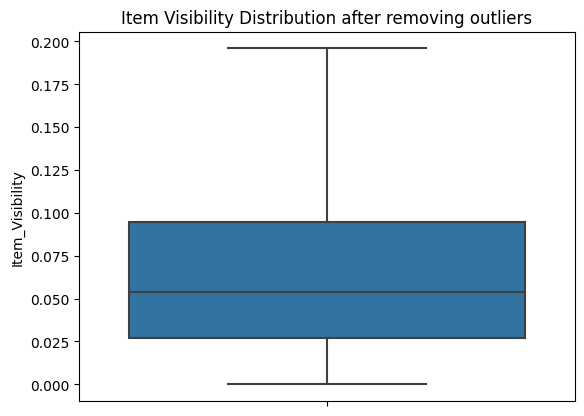

In [34]:
# Removing Outliers

lower_itemvisiblity,higher_itemvisiblity=remove_outlier(train1['Item_Visibility'])
train1['Item_Visibility']=np.where(train1['Item_Visibility']>higher_itemvisiblity,higher_itemvisiblity,train1['Item_Visibility'])
train1['Item_Visibility']=np.where(train1['Item_Visibility']<lower_itemvisiblity,lower_itemvisiblity,train1['Item_Visibility'])

sns.boxplot(y=train1['Item_Visibility'])
plt.title('Item Visibility Distribution after removing outliers')

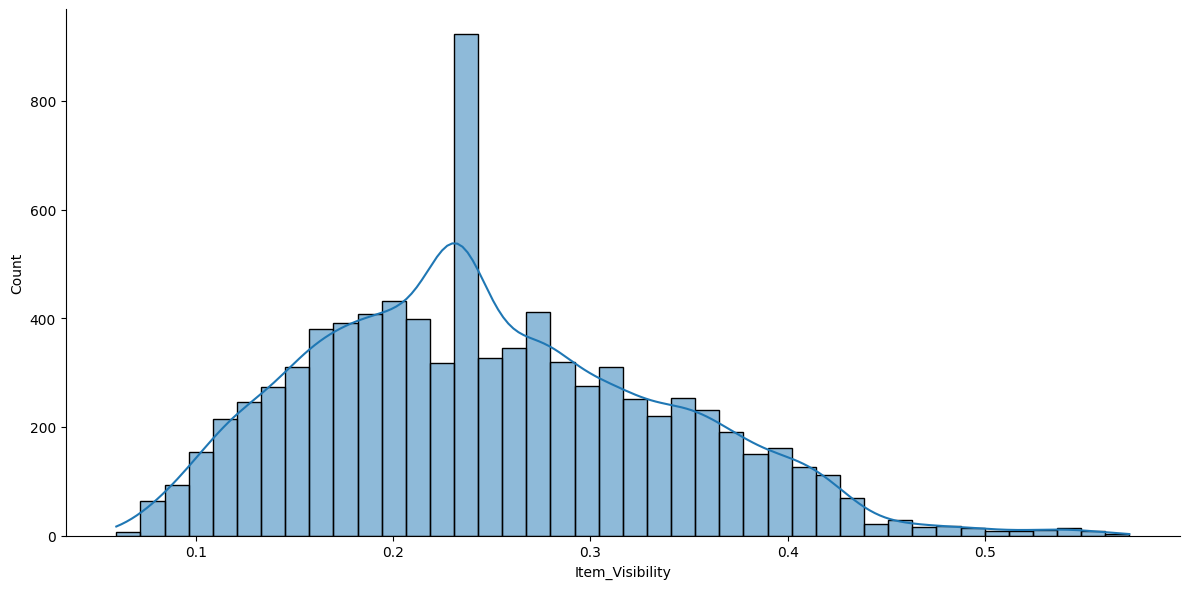

In [35]:
# After remvoing skewness and fixing outliers on trainset

sns.displot(x = 'Item_Visibility', data = train2, aspect = 2, height = 6, kde = True)


# Independent Variables (categorical variables)

In [36]:
categorical_train.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

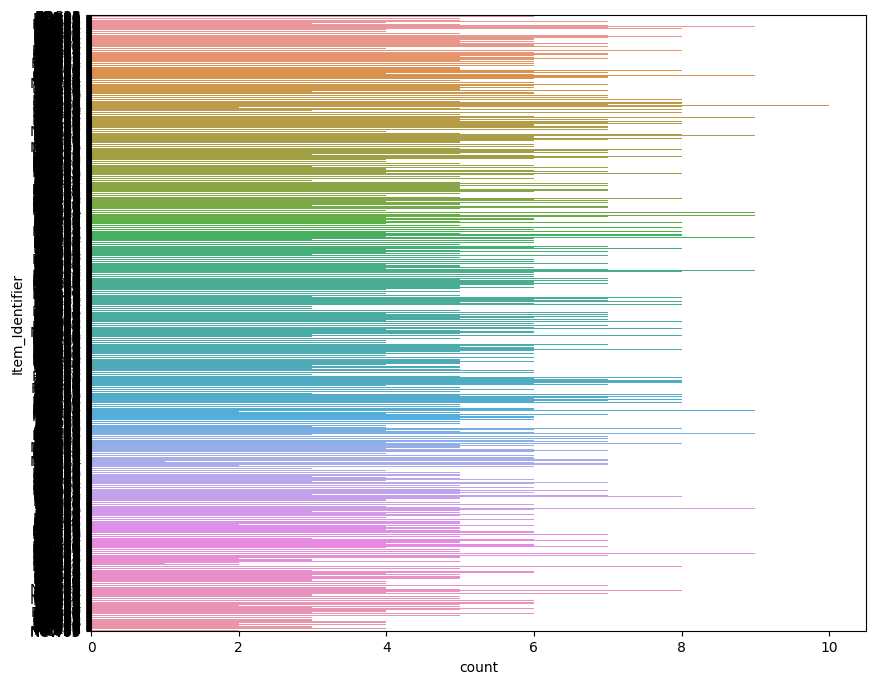

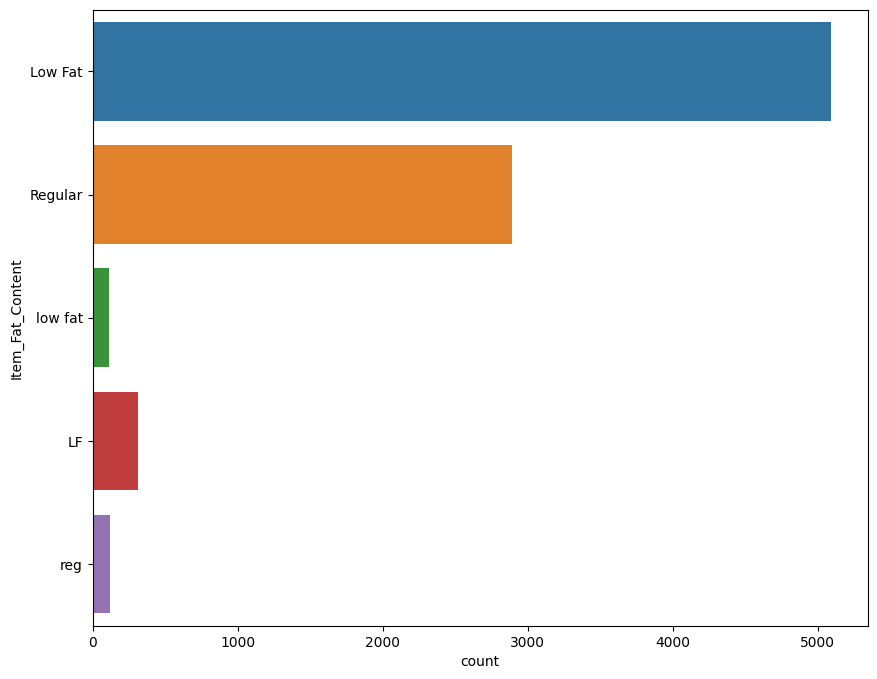

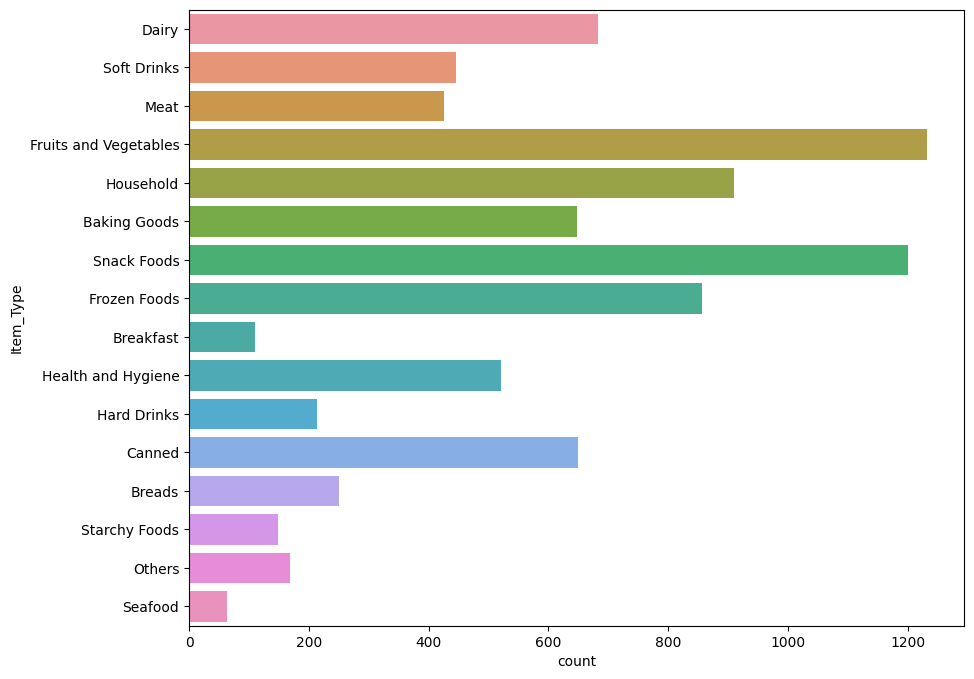

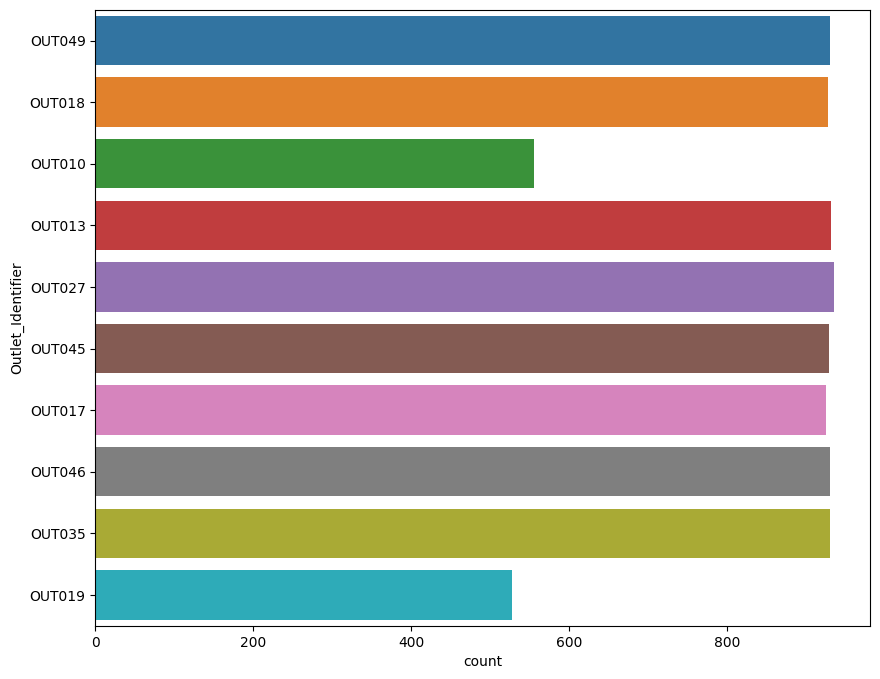

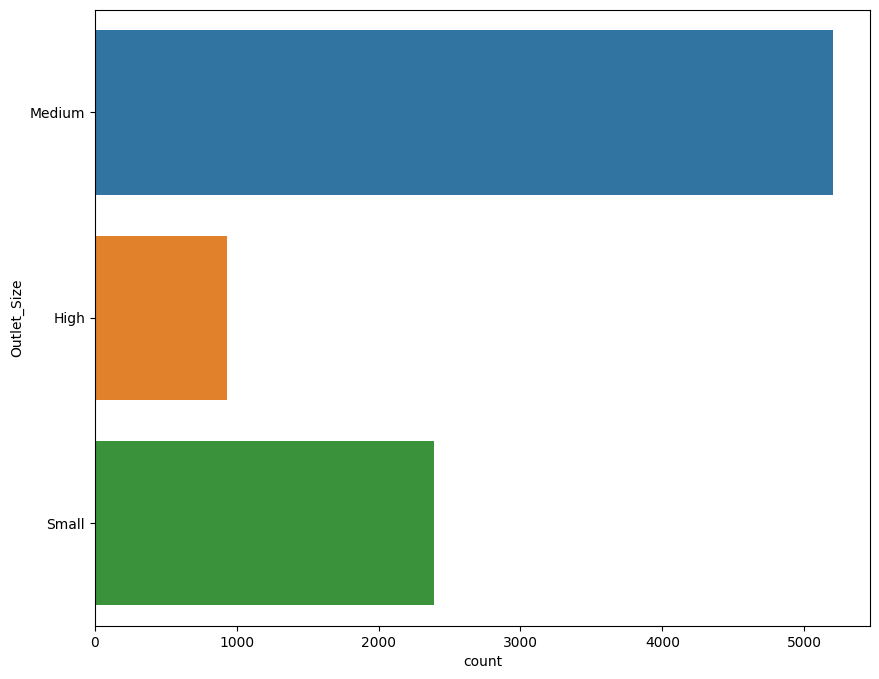

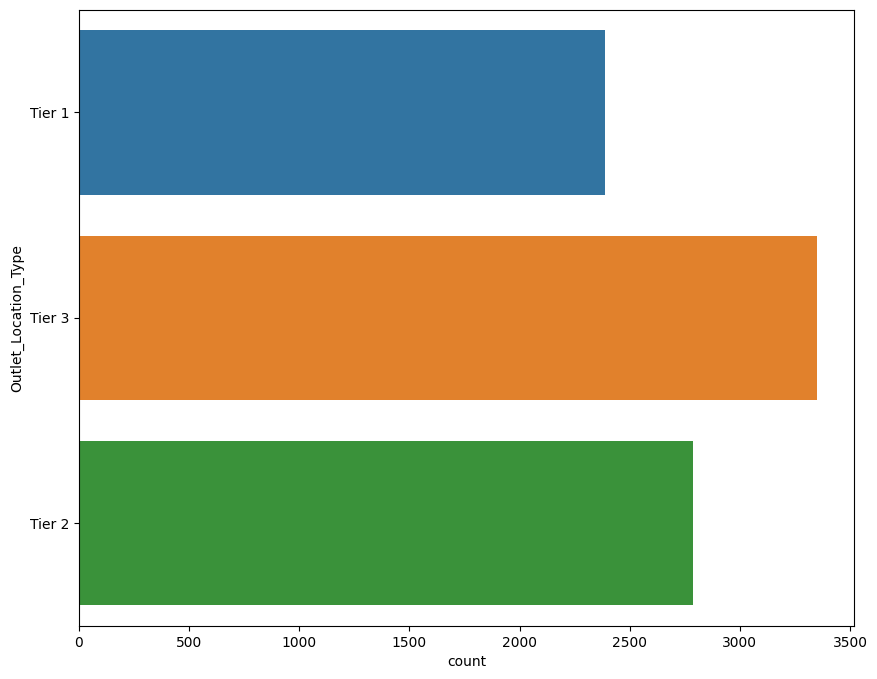

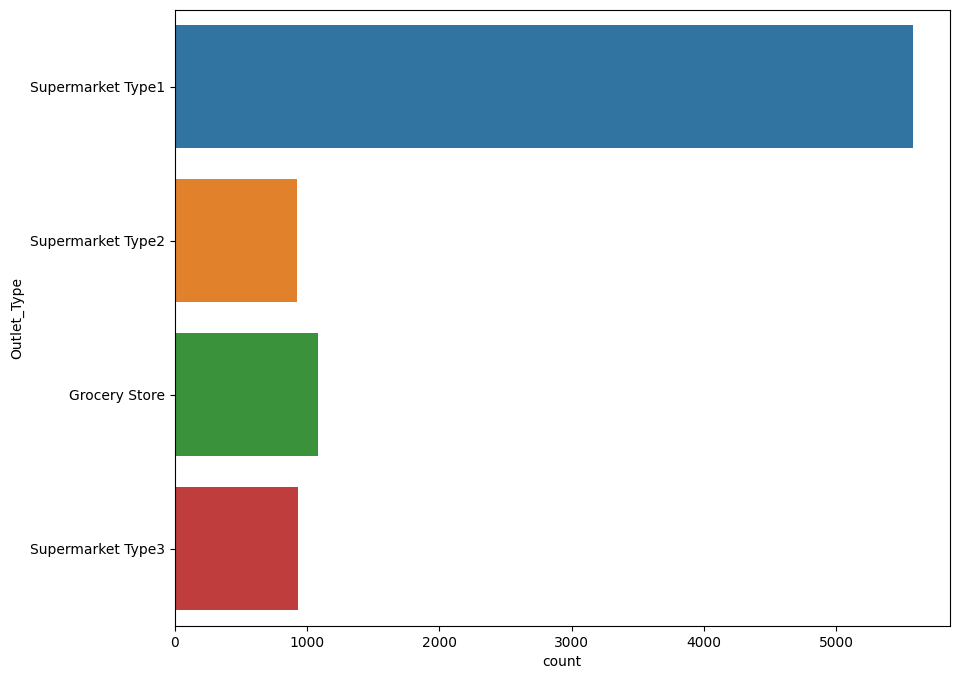

In [37]:
for i in categorical_train:
    plt.figure(figsize = (10,8))
    sns.countplot( y = i, data = train2)

In [38]:
# Item Identifier: There are lot of individual Item Identifiers.
# Item_Fat_Content: We have multiple same values, let's fix it.
# Fruits & Vegies, Frozen food, Dariy, Household and Snacks has highest number of counts.
# Supermarket has higher number of counts.

In [39]:
train2['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In the figure above, ‘LF’, ‘low fat’, and ‘Low Fat’ are the same category and can be combined into one.Similarly we can be done for ‘reg’ and ‘Regular’ into one.After making these corrections we’ll plot the same figure again.

In [40]:
train2['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace = True)

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='count'>

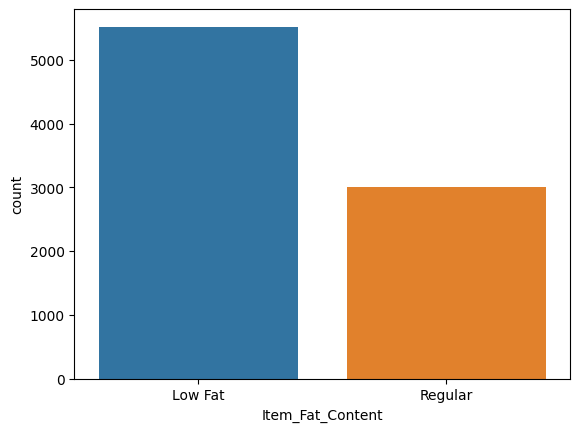

In [41]:
sns.countplot(x="Item_Fat_Content", data=train2)

# Bivariate Analysis

After looking at every feature individually, let’s now do some bivariate analysis. 
Here we’ll explore the independent variables with respect to the target variable. 
The objective is to discover hidden relationships between the independent variable and the target variable and use those findings in missing data imputation and feature engineering in the next module.

We will make use of scatter plots for the continuous or numeric variables and box plots for the categorical variables.

In [42]:
train3=train2.copy()

# Target Variable vs Independent Continuous Variables

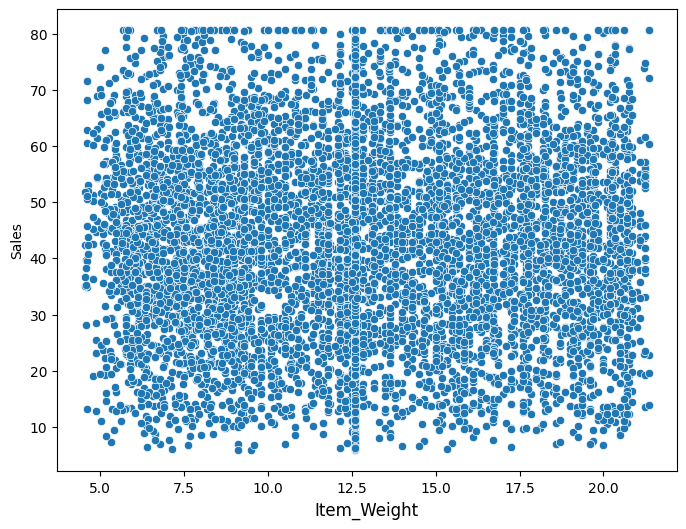

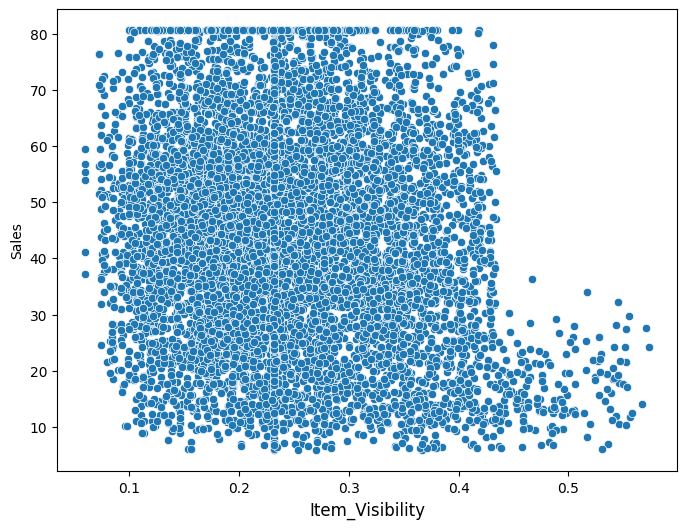

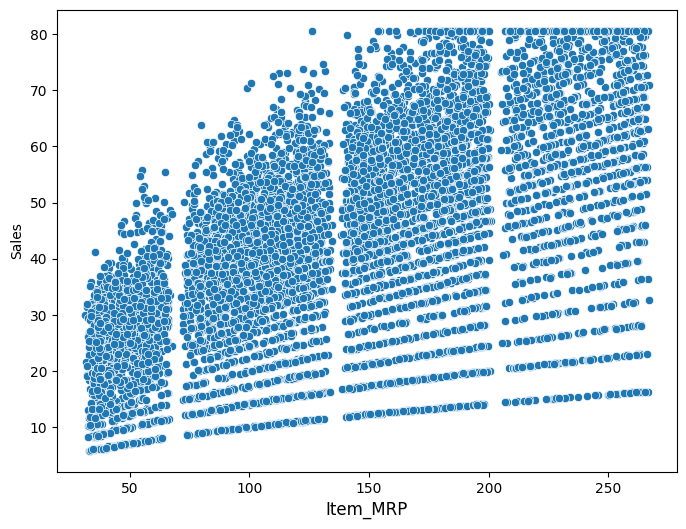

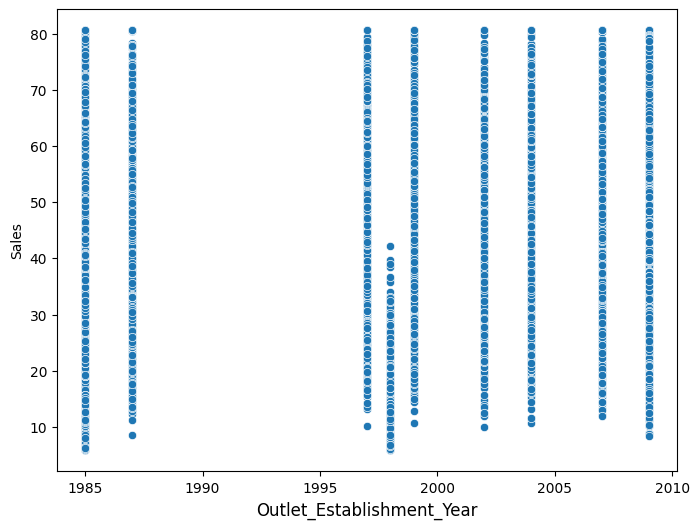

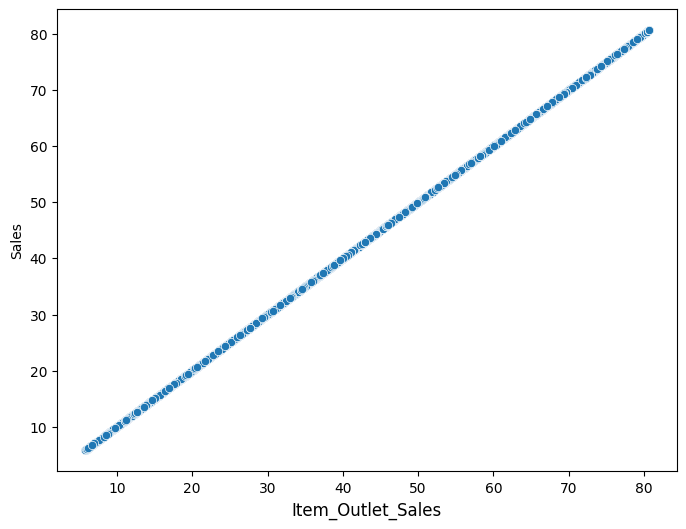

In [43]:
for i in numerical_train:
    plt.figure(figsize =(8,6))
    sns.scatterplot(data = train2, x = i, y = train3['Item_Outlet_Sales']);
    plt.xlabel(i, fontsize = 12)
    plt.ylabel("Sales")

Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.We observe, Item_MRP has linear relationship










# Target Variable vs Independent Categorical Variables

Now we’ll visualise the categorical variables with respect to Item_Outlet_Sales.
We will try to check the distribution of the target variable across all the categories of each of the categorical variable
#by using boxplot.

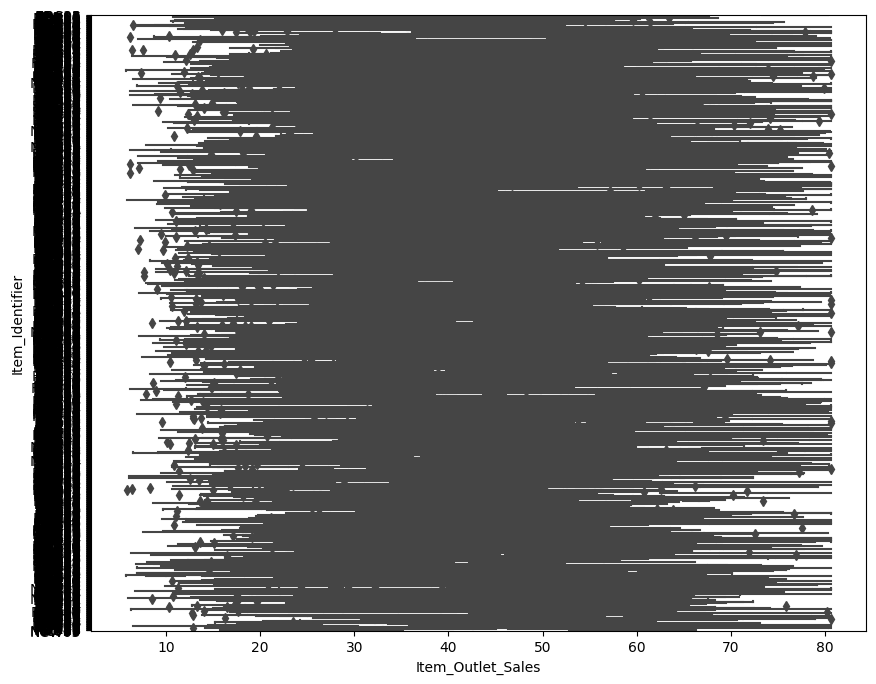

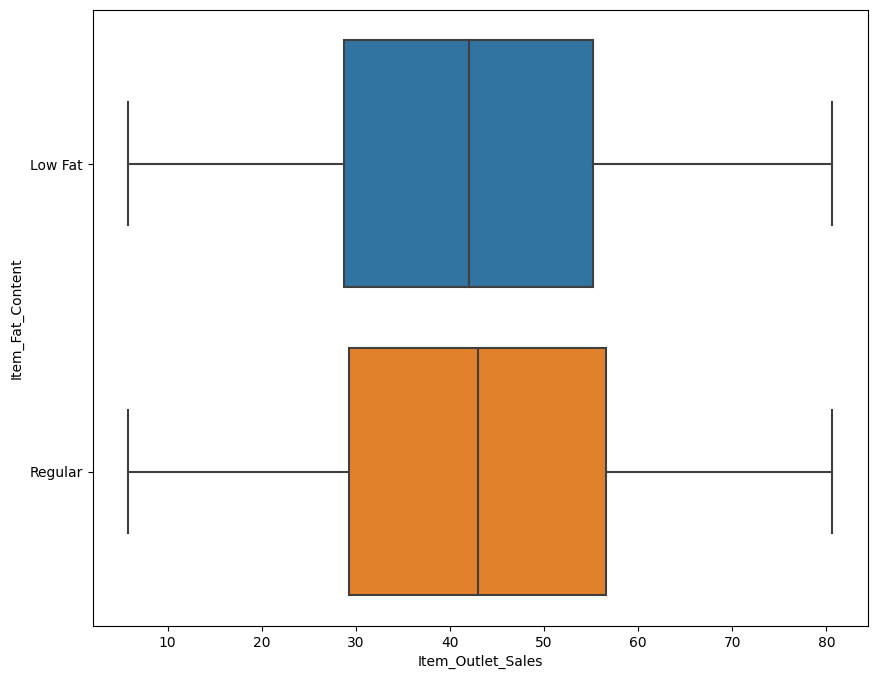

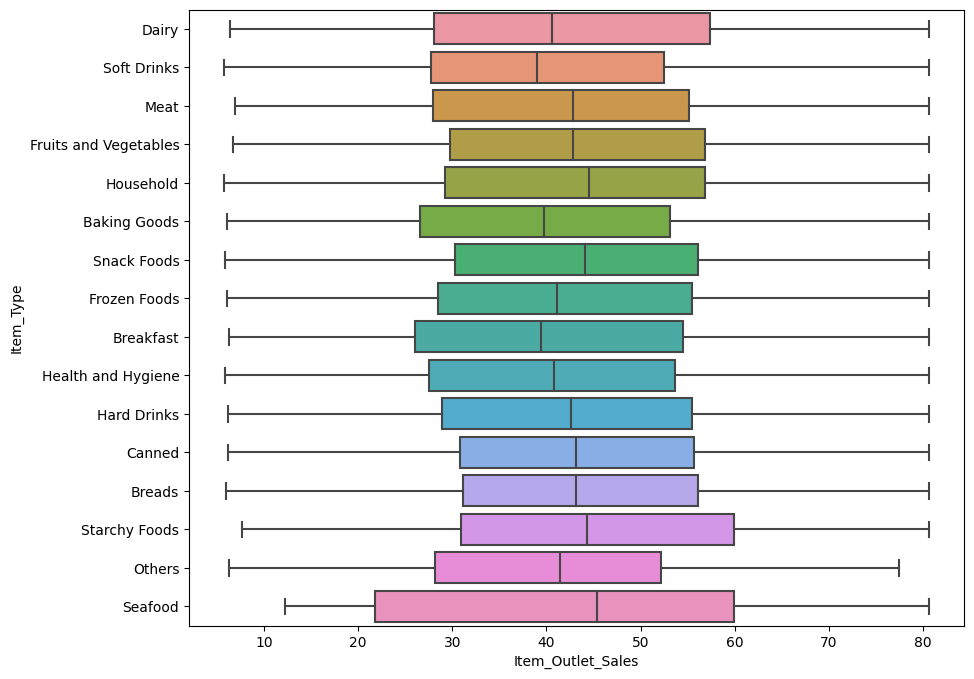

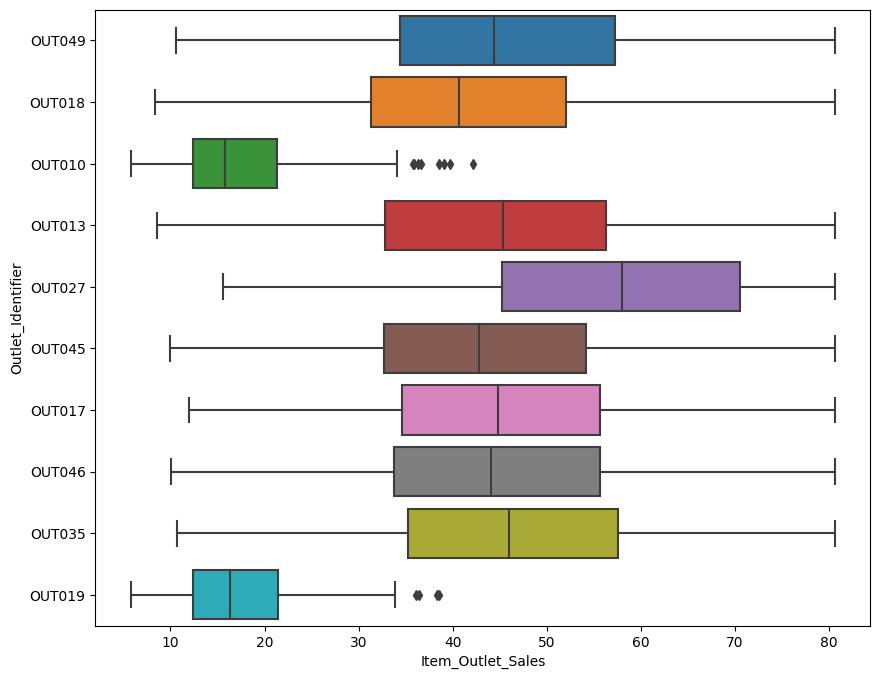

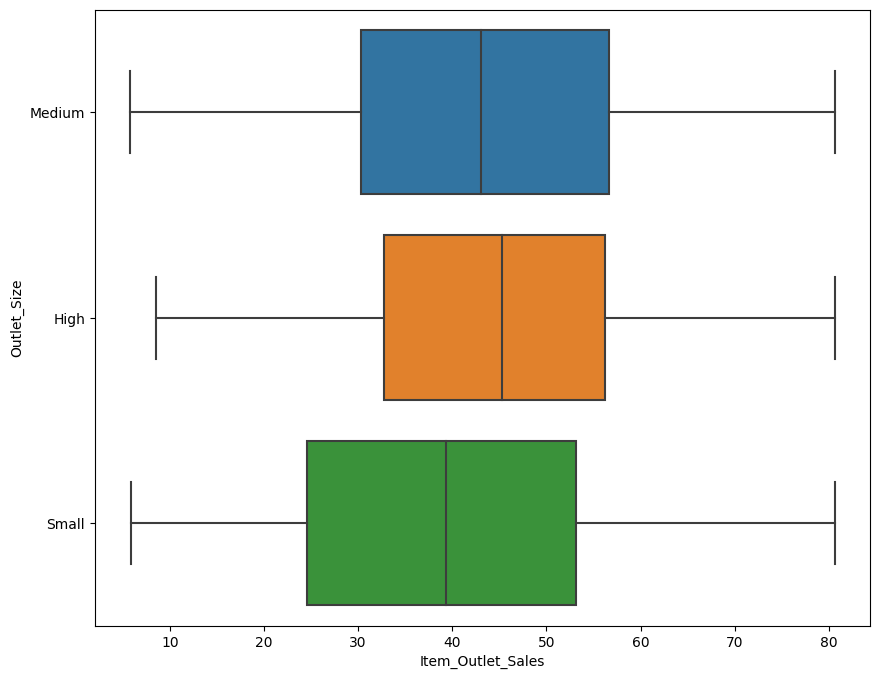

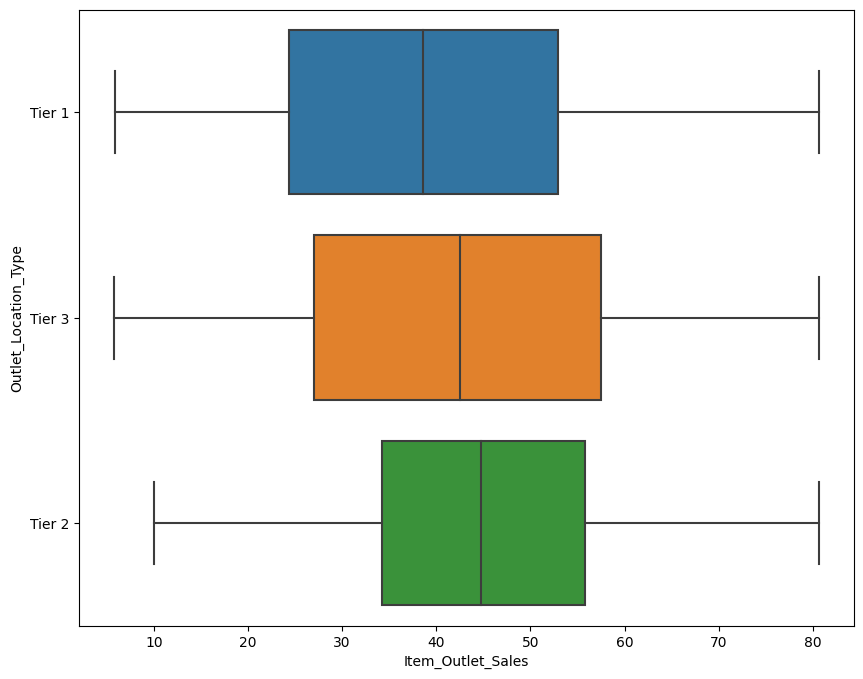

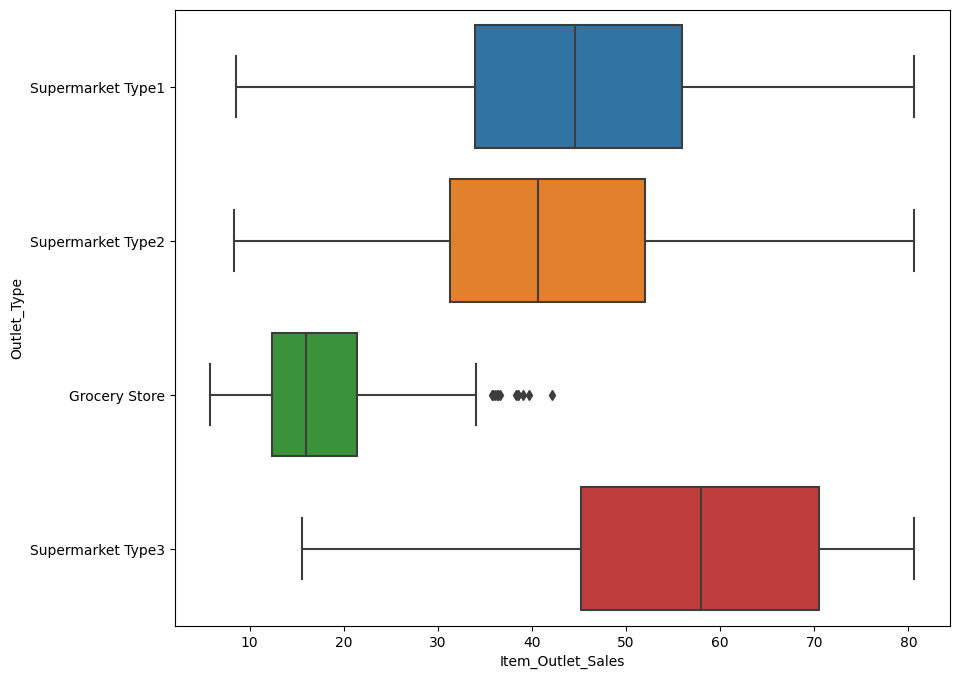

In [44]:
for i in categorical_train:
    plt.figure(figsize = (10,8))
    sns.boxplot( y = i, x = train3['Item_Outlet_Sales'],data = train3);

In [45]:
#In terms of 'Outlet_Type', Supermarket has highest demand (Type1 and Type3)
#Starchy Food, Dairy, Fruits & Vegetables and Households has highest sales. But most of them all equal in terms of overall sales.

# Skewness on Numbers

In [46]:
for i in numerical_train:
    print("\n")
    print(i)
    print("-" * 20)
    print("Skewness: %f" % train3[i].skew())
    print("Kurtosis: %f" % train3[i].kurt())
    print("-" * 20)



Item_Weight
--------------------
Skewness: 0.121845
Kurtosis: -0.858109
--------------------


Item_Visibility
--------------------
Skewness: 0.456333
Kurtosis: -0.138614
--------------------


Item_MRP
--------------------
Skewness: 0.127202
Kurtosis: -0.889769
--------------------


Outlet_Establishment_Year
--------------------
Skewness: -0.396641
Kurtosis: -1.205694
--------------------


Item_Outlet_Sales
--------------------
Skewness: 0.128620
Kurtosis: -0.725822
--------------------


# Encoding Categorical Variables


1). Label encoding simply means converting each category in a variable to a number. It is more suitable for ordinal variables — categorical variables with some order.
2). In One hot encoding, each category of a categorical variable is converted into a new binary column (1/0).

In [47]:
train4=train3.copy()

In [48]:
train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Label encoding for the categorical variables

In [49]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
categorical_train = train4.select_dtypes(include = 'object')
label_train = train4.copy()
for i in categorical_train:
    label_train[i] = label_encoder.fit_transform(train4[i])

In [50]:
label_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.126678,4,249.8092,9,1999,1,0,1,61.115775
1,8,5.920,1,0.138846,14,48.2692,3,2009,1,2,2,21.057607
2,662,17.500,0,0.129461,10,141.6180,9,1999,1,0,1,45.795961
3,1121,19.200,1,0.232230,6,182.0950,0,1998,1,2,0,27.062520
4,1297,8.930,0,0.232230,9,53.8614,1,1987,0,2,1,31.538947
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.238293,13,214.5218,1,1987,0,2,1,52.710373
8519,897,8.380,1,0.216754,0,108.1570,7,2002,1,1,1,23.436830
8520,1357,10.600,0,0.187580,8,85.1224,6,2004,2,1,1,34.541477
8521,681,7.210,1,0.381078,13,103.1332,3,2009,1,2,2,42.960419


# Correlation

<AxesSubplot: >

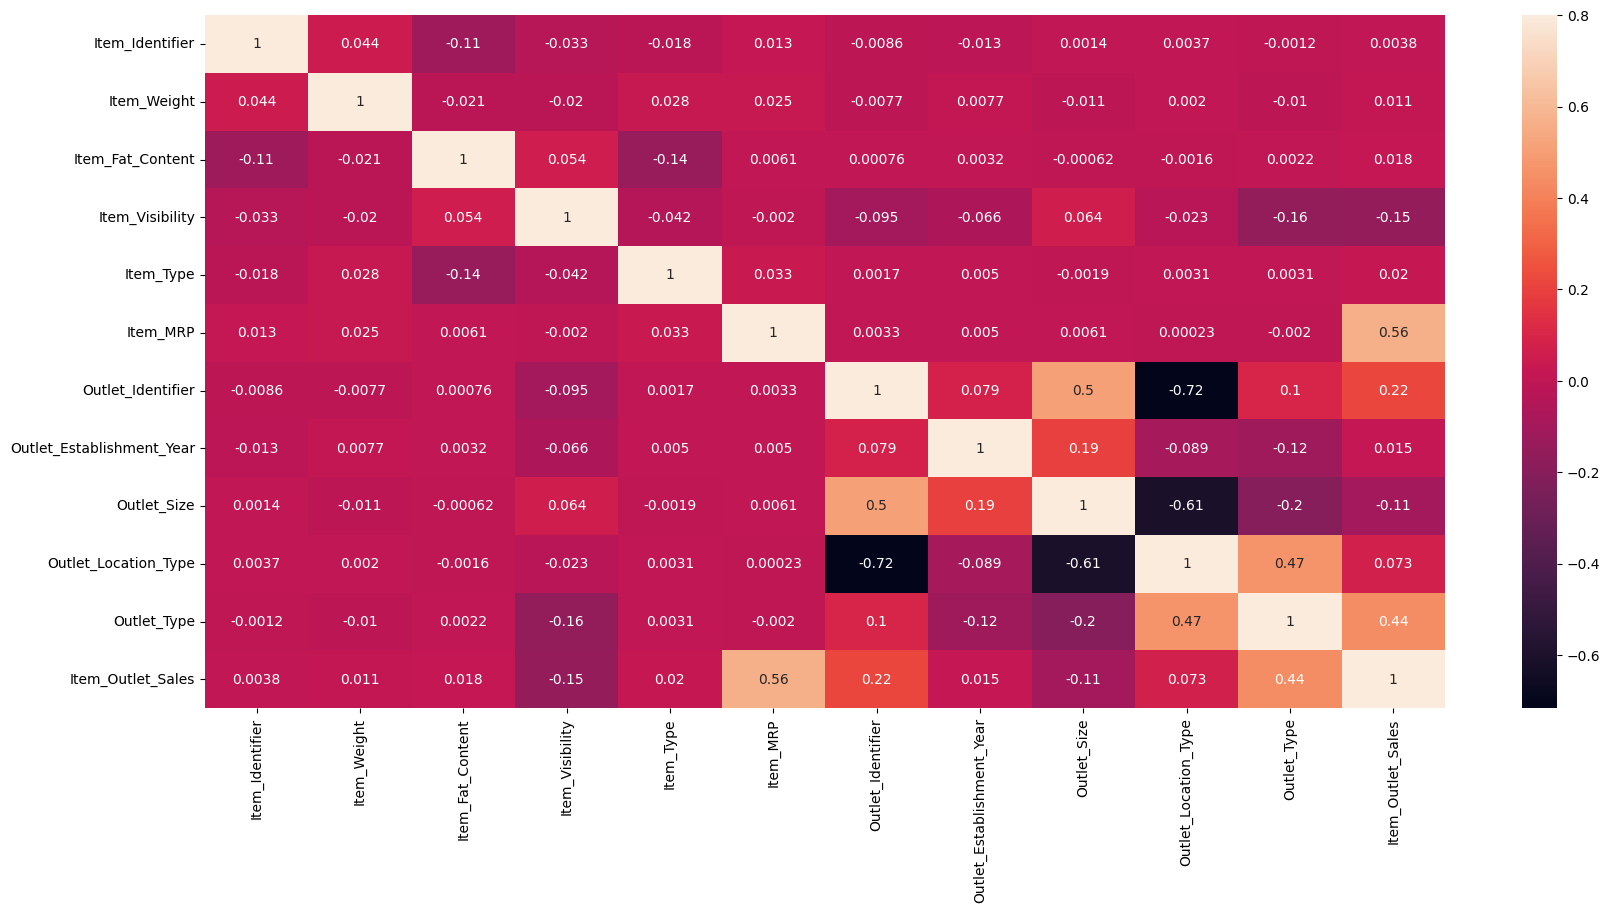

In [51]:
corrmat =label_train.corr()
f, ax = plt.subplots(figsize = (20,9))
sns.heatmap(corrmat, vmax = .8, annot = True)

# Dropping unrelated Columns

In [52]:
#drop_columns = ['Outlet_Establishment_Year','Item_Weight','Item_Visibility','Outlet_Size','Outlet_Establishment_Year','Outlet_Type','Item_Weight','Item_Identifier','Outlet_Size','Outlet_Type']
#train4.drop(drop_columns, axis =1 , inplace = True) 
#train4

In [53]:
drop_columns = ['Item_Identifier']
train4.drop(drop_columns, axis =1 , inplace = True) 
train4

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,61.115775
1,5.920,Regular,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,21.057607
2,17.500,Low Fat,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,45.795961
3,19.200,Regular,0.232230,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,27.062520
4,8.930,Low Fat,0.232230,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,31.538947
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.238293,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,52.710373
8519,8.380,Regular,0.216754,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,23.436830
8520,10.600,Low Fat,0.187580,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,34.541477
8521,7.210,Regular,0.381078,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,42.960419


# One Hot Encoding

In [54]:
train4 = pd.get_dummies(train4)
train4.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.126678,249.8092,1999,61.115775,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.138846,48.2692,2009,21.057607,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.129461,141.6180,1999,45.795961,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.232230,182.0950,1998,27.062520,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.232230,53.8614,1987,31.538947,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


# Model Building

In [55]:
from sklearn.linear_model import LinearRegression
x = train4.drop('Item_Outlet_Sales',axis = 1)
y = train4['Item_Outlet_Sales']

In [56]:
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.126678,249.8092,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.138846,48.2692,2009,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.129461,141.6180,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.232230,182.0950,1998,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.232230,53.8614,1987,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [57]:
y.head()

0    61.115775
1    21.057607
2    45.795961
3    27.062520
4    31.538947
Name: Item_Outlet_Sales, dtype: float64

# Scaling the Dataset

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = scaler.fit_transform(x)
x = pd.DataFrame(data = x1, columns = x.columns)

# Train - Test Split

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6818, 42) (1705, 42) (6818,) (1705,)


In [60]:
x_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
549,-0.783872,-0.678116,0.487415,0.139541,-1.354743,1.354743,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.350395,0.798807,-0.623893,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028
7757,1.227014,-0.338536,0.474526,0.497909,0.738147,-0.738147,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.350395,0.798807,-0.623893,-0.623893,1.435383,-0.804732,-0.381529,0.726802,-0.349551,-0.351028
764,1.132384,0.312746,-0.470081,-0.099372,-1.354743,1.354743,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.350395,-1.251866,1.602840,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028
6867,-1.061847,-0.845088,-1.595901,0.497909,0.738147,-0.738147,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.350395,0.798807,-0.623893,-0.623893,1.435383,-0.804732,-0.381529,0.726802,-0.349551,-0.351028
2716,0.008654,1.374005,0.233979,-0.099372,0.738147,-0.738147,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.350395,-1.251866,1.602840,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028


In [61]:
y_train.head()

549     48.849025
7757    55.713191
764     33.544031
6867    16.861097
2716    64.996161
Name: Item_Outlet_Sales, dtype: float64

# LINEAR REGRESSION

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math


lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [63]:
lr_predict = lr.predict(x_test)

In [64]:
yp = lr.predict(x_test)
print("R2 Score:", r2_score(y_test, lr_predict))
print("Mean Squarred Error:", mean_squared_error(y_test, lr_predict))
print("RMSE:", math.sqrt(mean_squared_error(y_test, lr_predict)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,lr_predict)))

R2 Score: 0.673332457399102
Mean Squarred Error: 104.03154187184873
RMSE: 10.199585377447885
Mean Absolute Error : 8.030634675777364


In [65]:
LR_SCORE=r2_score(y_test, lr_predict)
LR_SCORE

0.673332457399102

# XGBOOST REGRESSOR

In [66]:
!pip install xgboost

In [67]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 1000, learning_rate = 0.05)
xgb.fit(x_train, y_train)

predict = xgb.predict(x_test)

In [68]:
print("R2 Score:", r2_score(y_test, predict))
print("Mean Squarred Error:", mean_squared_error(y_test, predict))
print("RMSE:", math.sqrt(mean_squared_error(y_test, predict)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,predict)))

R2 Score: 0.6529916138630039
Mean Squarred Error: 110.5093489388937
RMSE: 10.512342695084369
Mean Absolute Error : 8.101001394381054


In [69]:
XGB_SCORE=r2_score(y_test, predict)
XGB_SCORE

0.6529916138630039

# RANDOMFOREST REGRESSOR


In [70]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 50, max_depth = 15, random_state = 47, min_samples_leaf = 10)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=10, n_estimators=50,
                      random_state=47)

In [71]:
rf_pred = rf.predict(x_test)

In [72]:
print("R2 Score:", r2_score(y_test, rf_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, rf_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, rf_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,rf_pred)))

R2 Score: 0.6848931127260565
Mean Squarred Error: 100.34990031928892
RMSE: 10.017479738900844
Mean Absolute Error : 7.705540212485497


In [73]:
RF_SCORE=r2_score(y_test, rf_pred)
RF_SCORE

0.6848931127260565

# LASSO REGRSSOR

In [74]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 0.01)
ls.fit(x_train, y_train)

Lasso(alpha=0.01)

In [75]:
lasso_pred = ls.predict(x_test)

In [76]:
print("R2 Score:", r2_score(y_test, lasso_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, lasso_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, lasso_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,lasso_pred)))

R2 Score: 0.6740225745471513
Mean Squarred Error: 103.81176506019443
RMSE: 10.188805870179019
Mean Absolute Error : 8.027027740817768


In [77]:
LASSO_REG=r2_score(y_test, lasso_pred)
LASSO_REG

0.6740225745471513

# RIDGE REGRESSOR

In [78]:
from sklearn.linear_model import Ridge
rd = Ridge(alpha = 0.01)
rd.fit(x_train, y_train)

Ridge(alpha=0.01)

In [79]:
ridge_pred = rd.predict(x_test)

In [80]:
print("R2 Score:", r2_score(y_test, ridge_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, ridge_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, ridge_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,ridge_pred)))

R2 Score: 0.6739671687608277
Mean Squarred Error: 103.82940975588096
RMSE: 10.189671719730766
Mean Absolute Error : 8.027256222323278


In [81]:
RIDGE_REG=r2_score(y_test, ridge_pred)
RIDGE_REG

0.6739671687608277

# Summary

In [82]:
models = ['LINEAR REGRESSION','XGBOOST REGRESSOR','RANDOMFOREST REGRESSOR','LASSO REGRSSOR','RIDGE REGRESSOR']
scores = [LR_SCORE,XGB_SCORE,RF_SCORE,LASSO_REG,RIDGE_REG]

models = pd.DataFrame({'Model' : models, 'Score' : scores})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,RANDOMFOREST REGRESSOR,0.684893
3,LASSO REGRSSOR,0.674023
4,RIDGE REGRESSOR,0.673967
0,LINEAR REGRESSION,0.673332
1,XGBOOST REGRESSOR,0.652992


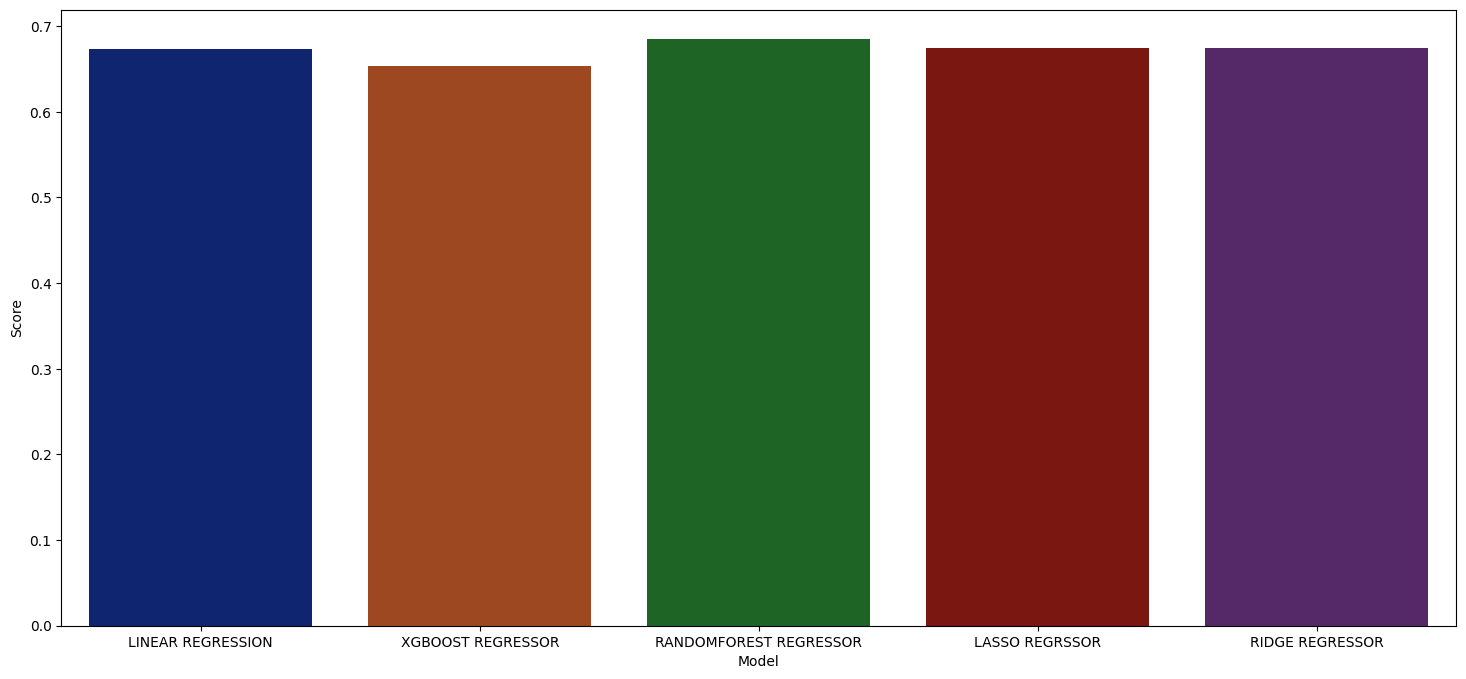

In [83]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'Model', y = 'Score', data = models, palette = 'dark')
plt.show()

Item_MRP optimizes Maximum Outlet sales (positive correlation with the target).
After trying and testing 5 different algorithms,we can see that RandForest Regressor has given the best r^2 score that is 68.4%.